Instalando bibliotecas necessárias

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Função para resolver o problema da mochila 0-1
def knapSack(W, wt, val, n):
    K = [[0 for w in range(W + 1)] for i in range(n + 1)]
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]],  K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
    return K


Função para resolver o problema da mochila 0-1


In [ ]:
# Função para resolver o problema da mochila 0-1
def knapSack(W, wt, val, n):
    K = [[0 for w in range(W + 1)] for i in range(n + 1)]
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]],  K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
    return K


SELECIONANDO AS AÇÕES CONFORME CONTEXTO DE EMPRESAS QUE ESTÃO AJUDANDO A DESENVOLVER A SOCIEDADE 5.0

In [ ]:

acoes_selecionadas = ['GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NVDA', 'IBM', 'SIEGY', 'CSCO', 'ADBE', 'SFTBY']

# Obtenha dados históricos dos últimos 2 anos
data_final = datetime.now()
data_inicial = data_final - timedelta(days=365*2)

dados = yf.download(acoes_selecionadas, start=data_inicial, end=data_final)["Close"]



Calculo da variação percentual

In [ ]:
# Calcule a variação percentual diária das ações
retorno_diario = dados.pct_change().dropna()



Aplicação do Knapsack Problem


In [ ]:
# Aplique o Knapsack Problem
pesos = [1] * len(acoes_selecionadas)
valores = (retorno_diario.mean() * 100).tolist()
capacidade = 3

tabela_knap = knapSack(capacidade, pesos, valores, len(acoes_selecionadas))



Encontrando as 3 melhores ações em termos de lucro

In [ ]:
# Encontre as 3 melhores ações em termos de lucro
acoes_escolhidas = []
i = len(acoes_selecionadas)
k = capacidade
while i > 0 and k > 0:
    if tabela_knap[i][k] != tabela_knap[i-1][k]:
        acoes_escolhidas.append(acoes_selecionadas[i-1])
        k -= pesos[i-1]
    i -= 1

print("As 3 melhores ações selecionadas:", acoes_escolhidas)


Visualizando o desempenho das ações selecionadas

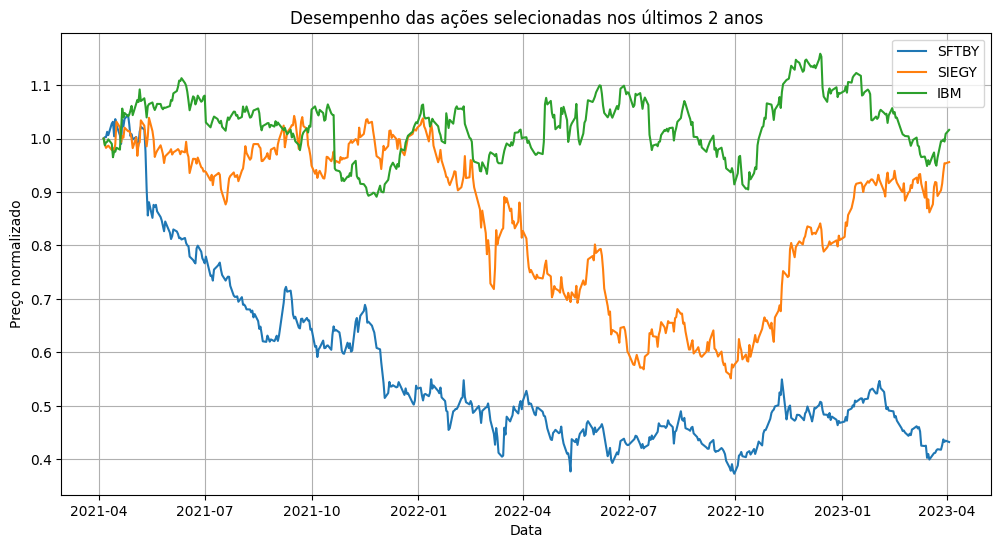

In [17]:
dados_acoes_escolhidas = dados[acoes_escolhidas]
dados_normalizados = dados_acoes_escolhidas / dados_acoes_escolhidas.iloc[0]

plt.figure(figsize=(12, 6))
plt.title("Desempenho das ações selecionadas nos últimos 2 anos")
plt.xlabel("Data")
plt.ylabel("Preço normalizado")
plt.grid()

for acao in acoes_escolhidas:
  plt.plot(dados_normalizados.index, dados_normalizados[acao], label=acao)

plt.legend()
plt.show()